#Estimating number of passengers

In [21]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv

--2022-08-23 14:14:15--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2180 (2.1K) [text/plain]
Saving to: ‘airline-passengers.csv.2’

airline-passengers. 100%[===================>]   2.13K  --.-KB/s    in 0s      

2022-08-23 14:14:15 (33.0 MB/s) - ‘airline-passengers.csv.2’ saved [2180/2180]



In [22]:
import pandas as pd

data = pd.read_csv('airline-passengers.csv', usecols=['Passengers'])

In [23]:
data.head()

,Passengers
0,112
1,118
2,132
3,129
4,121


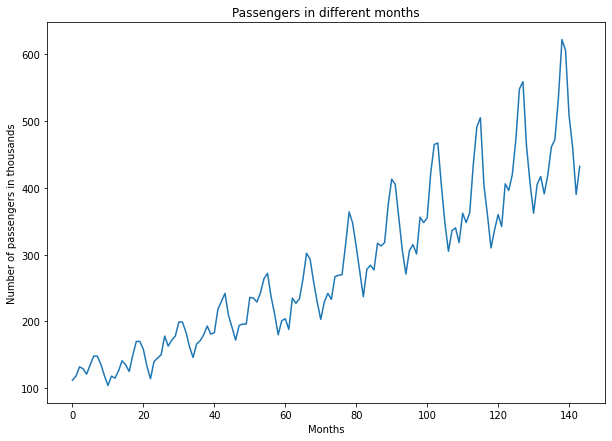

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.plot(data)
plt.xlabel('Months')
plt.ylabel('Number of passengers in thousands')
plt.title('Passengers in different months');

In [25]:
def train_test_split(data, look_back):
  x, y = [], []
  for i in range(len(data) - look_back - 1):
    x.append(data[i:i+look_back])
    y.append(data[i+look_back])
  print(len(x), len(y))
  # Split 80/20
  border_x, border_y = int(len(x) * .8), int(len(y) * .8)
  x_train, x_test = x[:border_x], x[border_x:]
  y_train, y_test = y[:border_y], y[border_y:]
  return x_train, x_test, y_train, y_test

In [26]:
import tensorflow as tf
X_train, X_test, y_train, y_test = train_test_split(data.values, 2)

X_train = tf.squeeze(tf.constant(X_train))
X_test = tf.squeeze(tf.constant(X_test))
y_train = tf.squeeze(tf.constant(y_train))
y_test = tf.squeeze(tf.constant(y_test))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

141 141


(TensorShape([112, 2]),
 TensorShape([29, 2]),
 TensorShape([112]),
 TensorShape([29]))

In [31]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss='mae',
              optimizer='adam',
              metrics=['mae'])

early_stop_callback = tf.keras.callbacks.EarlyStopping(patience=5,
                                                       restore_best_weights=True)

history_model = model.fit(X_train,
                          y_train,
                          epochs=1000,
                          validation_data=(X_test, y_test),
                          callbacks=[early_stop_callback])

Epoch 1/1000
4/4 [==============================] - 1s 93ms/step - loss: 267.7249 - mae: 267.7249 - val_loss: 487.4967 - val_mae: 487.4967
Epoch 2/1000
4/4 [==============================] - 0s 15ms/step - loss: 262.3047 - mae: 262.3047 - val_loss: 477.1956 - val_mae: 477.1956
Epoch 3/1000
4/4 [==============================] - 0s 15ms/step - loss: 256.6953 - mae: 256.6953 - val_loss: 466.8791 - val_mae: 466.8791
Epoch 4/1000
4/4 [==============================] - 0s 18ms/step - loss: 251.2715 - mae: 251.2715 - val_loss: 456.4897 - val_mae: 456.4897
Epoch 5/1000
4/4 [==============================] - 0s 16ms/step - loss: 245.6386 - mae: 245.6386 - val_loss: 446.1088 - val_mae: 446.1088
Epoch 6/1000
4/4 [==============================] - 0s 30ms/step - loss: 240.1147 - mae: 240.1147 - val_loss: 435.6990 - val_mae: 435.6990
Epoch 7/1000
4/4 [==============================] - 0s 30ms/step - loss: 234.5633 - mae: 234.5633 - val_loss: 425.2220 - val_mae: 425.2220
Epoch 8/1000
4/4 [=========

In [32]:
train_pred = model.predict(X_train)
test_pred = tf.squeeze(model.predict(X_test))

In [33]:
len(train_pred), len(test_pred)

(112, 29)

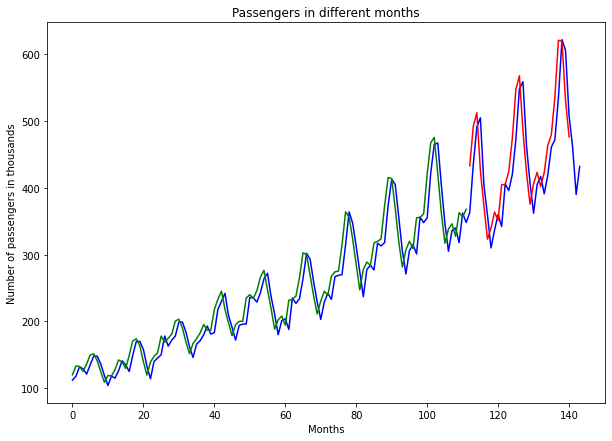

In [34]:
plt.figure(figsize=(10, 7))
plt.plot(data, c='b')
plt.plot(train_pred, c='g')
plt.plot(range(112, 141), test_pred, c='r')
plt.xlabel('Months')
plt.ylabel('Number of passengers in thousands')
plt.title('Passengers in different months');